# Predicting Tennis Match Results: Preprocessing

## Notebook by Lauren Dellon

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from library.sb_utils import save_file

In [2]:
tennis_numeric = pd.read_csv('../data/tennis_data_numeric.csv')
tennis_numeric.head()

,age,rank_points,rank,bpFaced,bpSaved,SvGms,2ndWon,1stWon,1stIn,svpt,df,ace,hand_R,outcome
0,26.0,810.0,63.0,4.0,4.0,17.0,26.0,58.0,73.0,117.0,4.0,8.0,1,1
1,29.0,1083.0,38.0,5.0,3.0,15.0,15.0,49.0,68.0,98.0,2.0,8.0,1,1
2,27.0,1835.0,19.0,7.0,6.0,10.0,12.0,37.0,43.0,76.0,6.0,9.0,1,1
3,26.0,275.0,185.0,0.0,0.0,11.0,10.0,39.0,43.0,58.0,0.0,12.0,1,1
4,31.0,1050.0,40.0,3.0,2.0,15.0,21.0,40.0,52.0,87.0,4.0,15.0,1,1


## Make X and y

In [3]:
X = tennis_numeric.drop(columns='outcome')
y = tennis_numeric.outcome

In [4]:
X.shape, y.shape

((86230, 13), (86230,))

## Split data into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

In [6]:
X_train.shape, X_test.shape

((68984, 13), (17246, 13))

In [7]:
y_train.shape, y_test.shape

((68984,), (17246,))

In [8]:
y_train.value_counts(), y_test.value_counts()

(1    34555
 0    34429
 Name: outcome, dtype: int64,
 1    8639
 0    8607
 Name: outcome, dtype: int64)

## Histograms

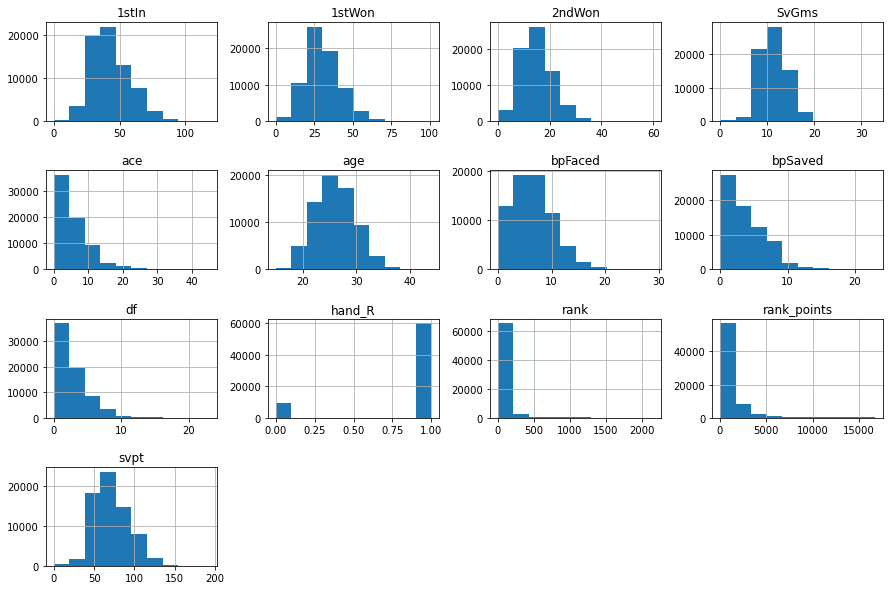

In [9]:
X_train.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

From these histograms, we see that the scales are different for different features. Additionally, some features have long right tails, including ace, bpFaced, bpSaved, df, rank, and rank_points. Therefore, I need to standardize the data to mean zero and unit variance. 

## Standardize data

In [10]:
# Specify which columns to standardize
to_scale = ['1stIn','1stWon','2ndWon','SvGms','age','svpt']
# Some of the following columns will be standardized in a separate step
not_to_scale = ['ace','bpFaced','bpSaved','df','hand_R','rank','rank_points']

In [11]:
# Fit and transform the training set
scaler = StandardScaler()
scaled_train = pd.DataFrame(scaler.fit_transform(X_train[to_scale]),columns=X_train[to_scale].columns).reset_index(drop=True)
X_train_scaled = pd.concat([scaled_train, X_train[not_to_scale].reset_index(drop=True)], axis=1)

In [12]:
# Transform the test set
scaled_test = pd.DataFrame(scaler.transform(X_test[to_scale]),columns=X_test[to_scale].columns).reset_index(drop=True)
X_test_scaled = pd.concat([scaled_test, X_test[not_to_scale].reset_index(drop=True)], axis=1)

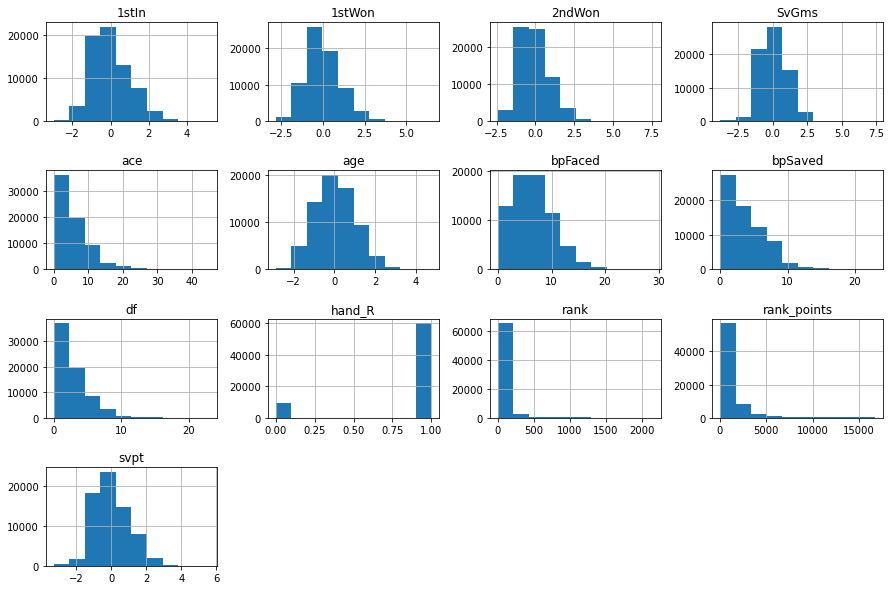

In [13]:
X_train_scaled.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

From these updated histograms, we see that the features that we chose to standardize have indeed been standardized to mean zero and unit variance. However, there are still some features with long right tails. Therefore, we need to log transform these features. Note that the PowerTransformer() log transforms AND standardizes the data.

In [14]:
# Log transform and standardize skewed columns
# Specify which columns to log transform
to_log = ['ace','bpFaced','bpSaved','df','rank','rank_points']
not_to_log = ['1stIn','1stWon','2ndWon','SvGms','age','svpt','hand_R']

In [15]:
# Fit and transform the training set
pt = PowerTransformer()
pt_train = pd.DataFrame(pt.fit_transform(X_train_scaled[to_log]),columns=X_train_scaled[to_log].columns).reset_index(drop=True)
X_train_scaled_pt = pd.concat([pt_train, X_train_scaled[not_to_log].reset_index(drop=True)], axis=1)

In [16]:
# Transform the test set
pt_test = pd.DataFrame(pt.transform(X_test_scaled[to_log]),columns=X_test_scaled[to_log].columns).reset_index(drop=True)
X_test_scaled_pt = pd.concat([pt_test, X_test_scaled[not_to_log].reset_index(drop=True)], axis=1)

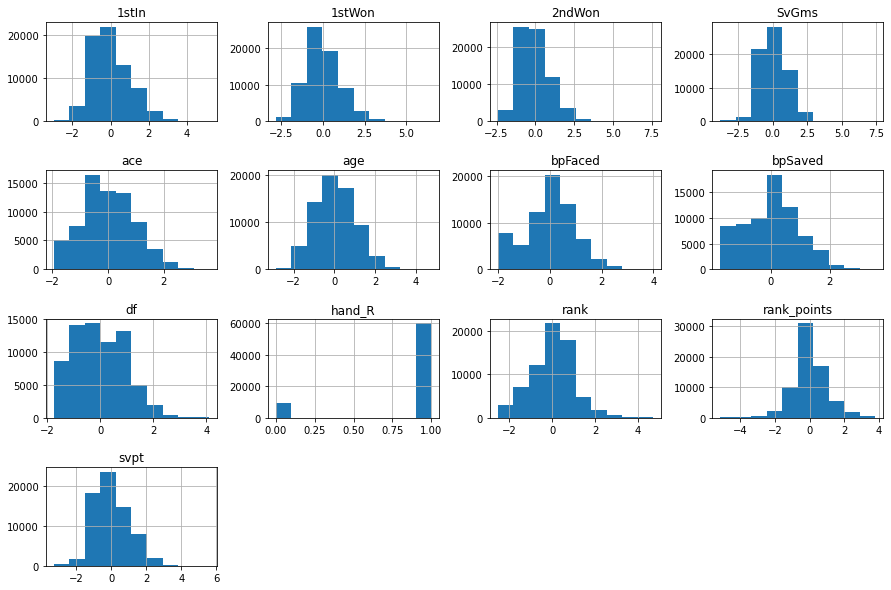

In [17]:
X_train_scaled_pt.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

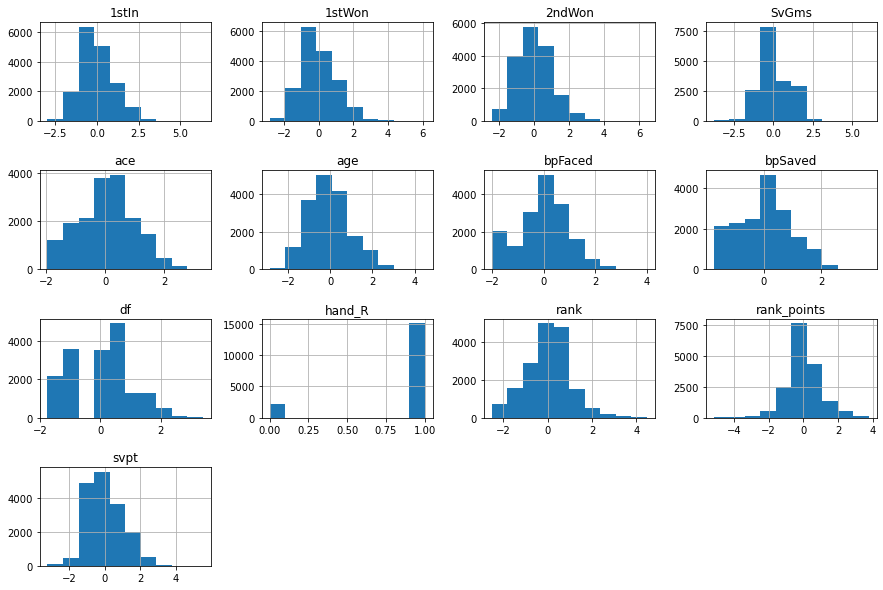

In [18]:
X_test_scaled_pt.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Now, all the features are standardized with zero-mean and unit-variance. The training and testing data are ready for modeling.

In [19]:
# Save the training and test data to new csv files
datapath = '../data'
save_file(X_train_scaled_pt, 'X_train.csv',datapath)
save_file(X_test_scaled_pt, 'X_test.csv',datapath)
save_file(y_train, 'y_train.csv',datapath)
save_file(y_test, 'y_test.csv',datapath)

Writing file.  "../data/X_train.csv"
Writing file.  "../data/X_test.csv"
Writing file.  "../data/y_train.csv"
Writing file.  "../data/y_test.csv"
